Saving Lord_Krishna_and_Balaram.jpg to Lord_Krishna_and_Balaram.jpg
Image dimensions: (864, 1152)
l1 (max power of 2 dividing m1): 5
l2 (max power of 2 dividing n1): 7
Enter l (1 ≤ l ≤ min(5, 7)): 4
Enter a (must be coprime to m1*n1+1 = 995329): 13
Enter permutation α (space-separated 16 integers from 1 to 16):
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16
Enter permutation β (space-separated 16 integers from 1 to 16):
16 15 14 13 12 11 10 9 8 7 6 5 4 3 2 1


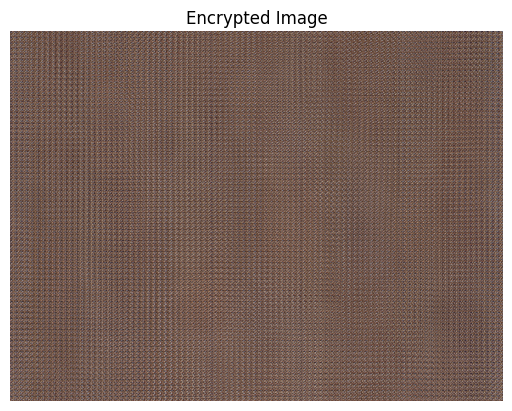

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# 📌 Import Required Libraries
import numpy as np
import cv2
from math import ceil, log2
from google.colab import files
from PIL import Image
import io
import matplotlib.pyplot as plt

# 📌 Step 1: Upload Image
uploaded = files.upload()

# Load image using PIL, convert to RGB, then to NumPy array
for fname in uploaded.keys():
    image = Image.open(io.BytesIO(uploaded[fname])).convert('RGB')
    break  # Only process one image

A = np.array(image)
m1, n1, channels = A.shape

# 📌 Step 2: Check for even dimensions
if m1 % 2 != 0 or n1 % 2 != 0:
    raise ValueError("Image dimensions must be even. Please upload a valid image.")

# 📌 Step 3: Compute l1 and l2
def max_power_of_2_dividing(n):
    power = 0
    while n % 2 == 0:
        n = n // 2
        power += 1
    return power

l1 = max_power_of_2_dividing(m1)
l2 = max_power_of_2_dividing(n1)
print(f"Image dimensions: ({m1}, {n1})")
print(f"l1 (max power of 2 dividing m1): {l1}")
print(f"l2 (max power of 2 dividing n1): {l2}")

# 📌 Step 4: Get encryption parameters
l = int(input(f"Enter l (1 ≤ l ≤ min({l1}, {l2})): "))
if not (1 <= l <= min(l1, l2)):
    raise ValueError("Invalid l")

L = 2 ** l
a = int(input(f"Enter a (must be coprime to m1*n1+1 = {m1 * n1 + 1}): "))
if np.gcd(a, m1 * n1 + 1) != 1:
    raise ValueError("a is not coprime to m1*n1+1")

print(f"Enter permutation α (space-separated {L} integers from 1 to {L}):")
alpha = list(map(int, input().split()))
if sorted(alpha) != list(range(1, L + 1)):
    raise ValueError("Invalid permutation α")

print(f"Enter permutation β (space-separated {L} integers from 1 to {L}):")
beta = list(map(int, input().split()))
if sorted(beta) != list(range(1, L + 1)):
    raise ValueError("Invalid permutation β")

# 📌 Step 5: Initialize Encrypted Image
A_prime = np.zeros_like(A)

# 📌 Step 6: Encryption Algorithm
for i in range(m1):
    for j in range(n1):
        x = (ceil((i + 1) / L) - 1) * L
        y = (ceil((j + 1) / L) - 1) * L

        alpha_val = alpha[(i + 1 - x) - 1]  # alpha is 1-based
        beta_val  = beta[(j + 1 - y) - 1]   # beta is 1-based

        k = (x + alpha_val - 1) * n1 + (y + beta_val)
        k_prime = (k * a) % (m1 * n1 + 1)

        Q = k_prime // n1
        R = k_prime % n1

        i_prime = Q if R == 0 else Q + 1
        j_prime = n1 if R == 0 else R

        # Adjust to 0-based indices
        i_p = i_prime - 1
        j_p = j_prime - 1

        A_prime[i_p, j_p, :] = A[i, j, :]

# 📌 Step 7: Show and Save Encrypted Image
encrypted_img = Image.fromarray(A_prime)
plt.imshow(encrypted_img)
plt.title("Encrypted Image")
plt.axis('off')
plt.show()

# Save the image
output_name = "encrypted_image.png"
encrypted_img.save(output_name)
files.download(output_name)
